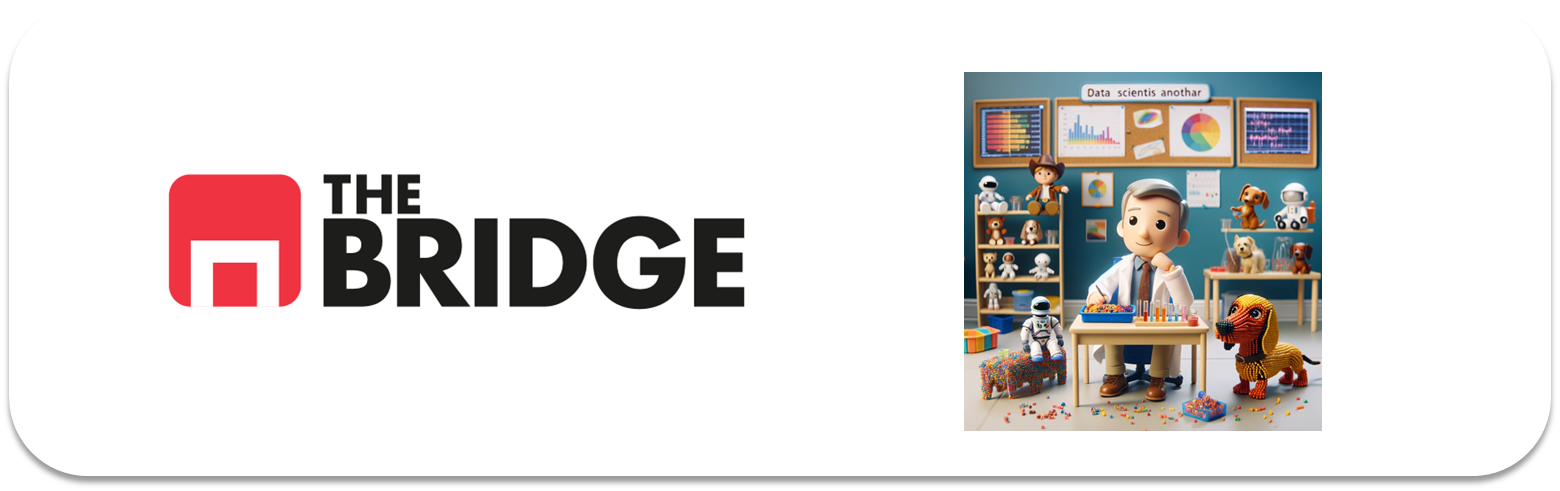

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools

### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [2]:
list = sns.get_dataset_names()
list

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df_titanic = sns.load_dataset('titanic')



In [4]:
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [5]:
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [6]:
df_titanic.info()
# Si hay nulos en age , embarked, deck y embark_town

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [7]:
for i in df_titanic.columns:
    porcentaje_nulos = len(df_titanic.loc[df_titanic[i].isna()])/len(df_titanic)
    if len(df_titanic.loc[df_titanic[i].isna()])/len(df_titanic) != 0.0:
        print(f'la columna {i} tiene un porcentaje de nulos de {porcentaje_nulos}')

la columna age tiene un porcentaje de nulos de 0.19865319865319866
la columna embarked tiene un porcentaje de nulos de 0.002244668911335578
la columna deck tiene un porcentaje de nulos de 0.7721661054994389
la columna embark_town tiene un porcentaje de nulos de 0.002244668911335578


In [8]:
df_titanic["age"].mean()

29.69911764705882

In [9]:
#la columna Age le voy a dar el valor de la media

df_titanic.loc[df_titanic.age.isna(),"age"] = df_titanic["age"].mean()

In [10]:
#Tanto para la columna emmarked como la de embark_town tienen el mismo porcentaje y vemos que son las mismas personas, por lo que vemos que ambas dos han embarcabdo en el mostrador B y ambas en primera clase, por lo que filtramos por esos valores y les damos el valor de la media
df_titanic.loc[(df_titanic.embarked.isna()) | (df_titanic.embark_town.isna()) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [11]:
#Tanto para la columna emmarked como la de embark_town tienen el mismo porcentaj
df_titanic.loc[(df_titanic.deck=="B") & (df_titanic["class"]=="First")]["embark_town"].mode()[0][0]

'S'

In [12]:
df_titanic.loc[(df_titanic.embarked.isna()) | (df_titanic.embark_town.isna()), ["embarked","embark_town"] ] = [df_titanic.loc[(df_titanic.deck=="B") & (df_titanic["class"]=="First")]["embark_town"].mode()[0][0],df_titanic.loc[(df_titanic.deck=="B") & (df_titanic["class"]=="First")]["embark_town"].mode()[0]]

In [13]:
df_titanic.loc[(df_titanic.deck=="B") & (df_titanic["class"]=="First")]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
54,0,1,male,65.000000,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
61,1,1,female,38.000000,0,0,80.0000,S,First,woman,False,B,Southampton,yes,True
118,0,1,male,24.000000,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
139,0,1,male,24.000000,0,0,79.2000,C,First,man,True,B,Cherbourg,no,True
170,0,1,male,61.000000,0,0,33.5000,S,First,man,True,B,Southampton,no,True
194,1,1,female,44.000000,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
195,1,1,female,58.000000,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
257,1,1,female,30.000000,0,0,86.5000,S,First,woman,False,B,Southampton,yes,True
263,0,1,male,40.000000,0,0,0.0000,S,First,man,True,B,Southampton,no,True


In [ ]:
#La columna deck tiene un 77% de nulos por lo que la eliminamos ya que es dificil recreala, por lo que tambien la eliminamos junto a parch

In [14]:
df_titanic.drop(columns=["deck", "parch"],inplace=True)

In [15]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  891 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -survived       | - superviviente o no, bool|
| -pclass       | - En que clase de camarote estaba, int |
| -sex       | - Hombre o mujer|
| -age       | - Edad |
| -sibsp       | - numero de hermanos o esposo a bordo  |
| -fare       | - Tarifa|
| -embarked       | - incial del pueblo donde embarco|
| -class       | - tipo de clase |
| -who       | - diferencia entre adulto y niños|
| -adult_male       | - hombre adulto|
| -embark_town       | - pueblo de embarque|
| -alive       | - superviviente|
| -alone       | - sobreevivio solo? |




### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [16]:
df_titanic.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [17]:
def cambiarinicial(inicial):
    if inicial == "S":
        return 'Southampton'
    elif inicial == "Q":
        return 'Queenstown'
    else:
        return 'Cherbourg'

In [18]:
df_titanic["city"] = df_titanic["embarked"].transform(cambiarinicial)

In [19]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone,city
0,0,3,male,22.000000,1,7.2500,S,Third,man,True,Southampton,no,False,Southampton
1,1,1,female,38.000000,1,71.2833,C,First,woman,False,Cherbourg,yes,False,Cherbourg
2,1,3,female,26.000000,0,7.9250,S,Third,woman,False,Southampton,yes,True,Southampton
3,1,1,female,35.000000,1,53.1000,S,First,woman,False,Southampton,yes,False,Southampton
4,0,3,male,35.000000,0,8.0500,S,Third,man,True,Southampton,no,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,S,Second,man,True,Southampton,no,True,Southampton
887,1,1,female,19.000000,0,30.0000,S,First,woman,False,Southampton,yes,True,Southampton
888,0,3,female,29.699118,1,23.4500,S,Third,woman,False,Southampton,no,False,Southampton
889,1,1,male,26.000000,0,30.0000,C,First,man,True,Cherbourg,yes,True,Cherbourg


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

| Categoricas| numericas |
| ---------------- | ----------- |
| -survived       | - superviviente o no, bool|
| -pclass       | - En que clase de camarote estaba, int |
| -sex       | - Hombre o mujer|

In [20]:
#Seleccion
df_tipificacion = pd.DataFrame([df_titanic.nunique(), df_titanic.nunique()/len(df_titanic)*100, df_titanic.dtypes]).T.rename(columns={0:"Card",1:"%_card",2:"tipo"})
df_tipificacion

,Card,%_card,tipo
survived,2,0.224467,int64
pclass,3,0.3367,int64
sex,2,0.224467,object
age,89,9.988777,float64
sibsp,7,0.785634,int64
fare,248,27.833895,float64
embarked,3,0.3367,object
class,3,0.3367,category
who,3,0.3367,object
adult_male,2,0.224467,bool


In [21]:
df_tipificacion["Clasificada_como"] = "Categorica"
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Discreta"
df_tipificacion.loc[df_tipificacion.Card > 10, "Clasificada_como"] = "Numerica Continua"

In [22]:
df_tipificacion

,Card,%_card,tipo,Clasificada_como
survived,2,0.224467,int64,Binaria
pclass,3,0.3367,int64,Categorica
sex,2,0.224467,object,Binaria
age,89,9.988777,float64,Numerica Continua
sibsp,7,0.785634,int64,Categorica
fare,248,27.833895,float64,Numerica Continua
embarked,3,0.3367,object,Categorica
class,3,0.3367,category,Categorica
who,3,0.3367,object,Categorica
adult_male,2,0.224467,bool,Binaria


### #2.1 Categóricas

In [23]:
categoricas_titanic = df_tipificacion.loc[(df_tipificacion["Clasificada_como"] == "Categorica") | (df_tipificacion["Clasificada_como"] == "Binaria")].index

In [24]:
for catego in categoricas_titanic:
    print(f"para {catego}")
    print(df_titanic[catego].value_counts())
    print("\n"*2)

para survived
survived
0    549
1    342
Name: count, dtype: int64



para pclass
pclass
3    491
1    216
2    184
Name: count, dtype: int64



para sex
sex
male      577
female    314
Name: count, dtype: int64



para sibsp
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64



para embarked
embarked
S    646
C    168
Q     77
Name: count, dtype: int64



para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



para adult_male
adult_male
True     537
False    354
Name: count, dtype: int64



para embark_town
embark_town
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64



para alive
alive
no     549
yes    342
Name: count, dtype: int64



para alone
alone
True     537
False    354
Name: count, dtype: int64



para city
city
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype:

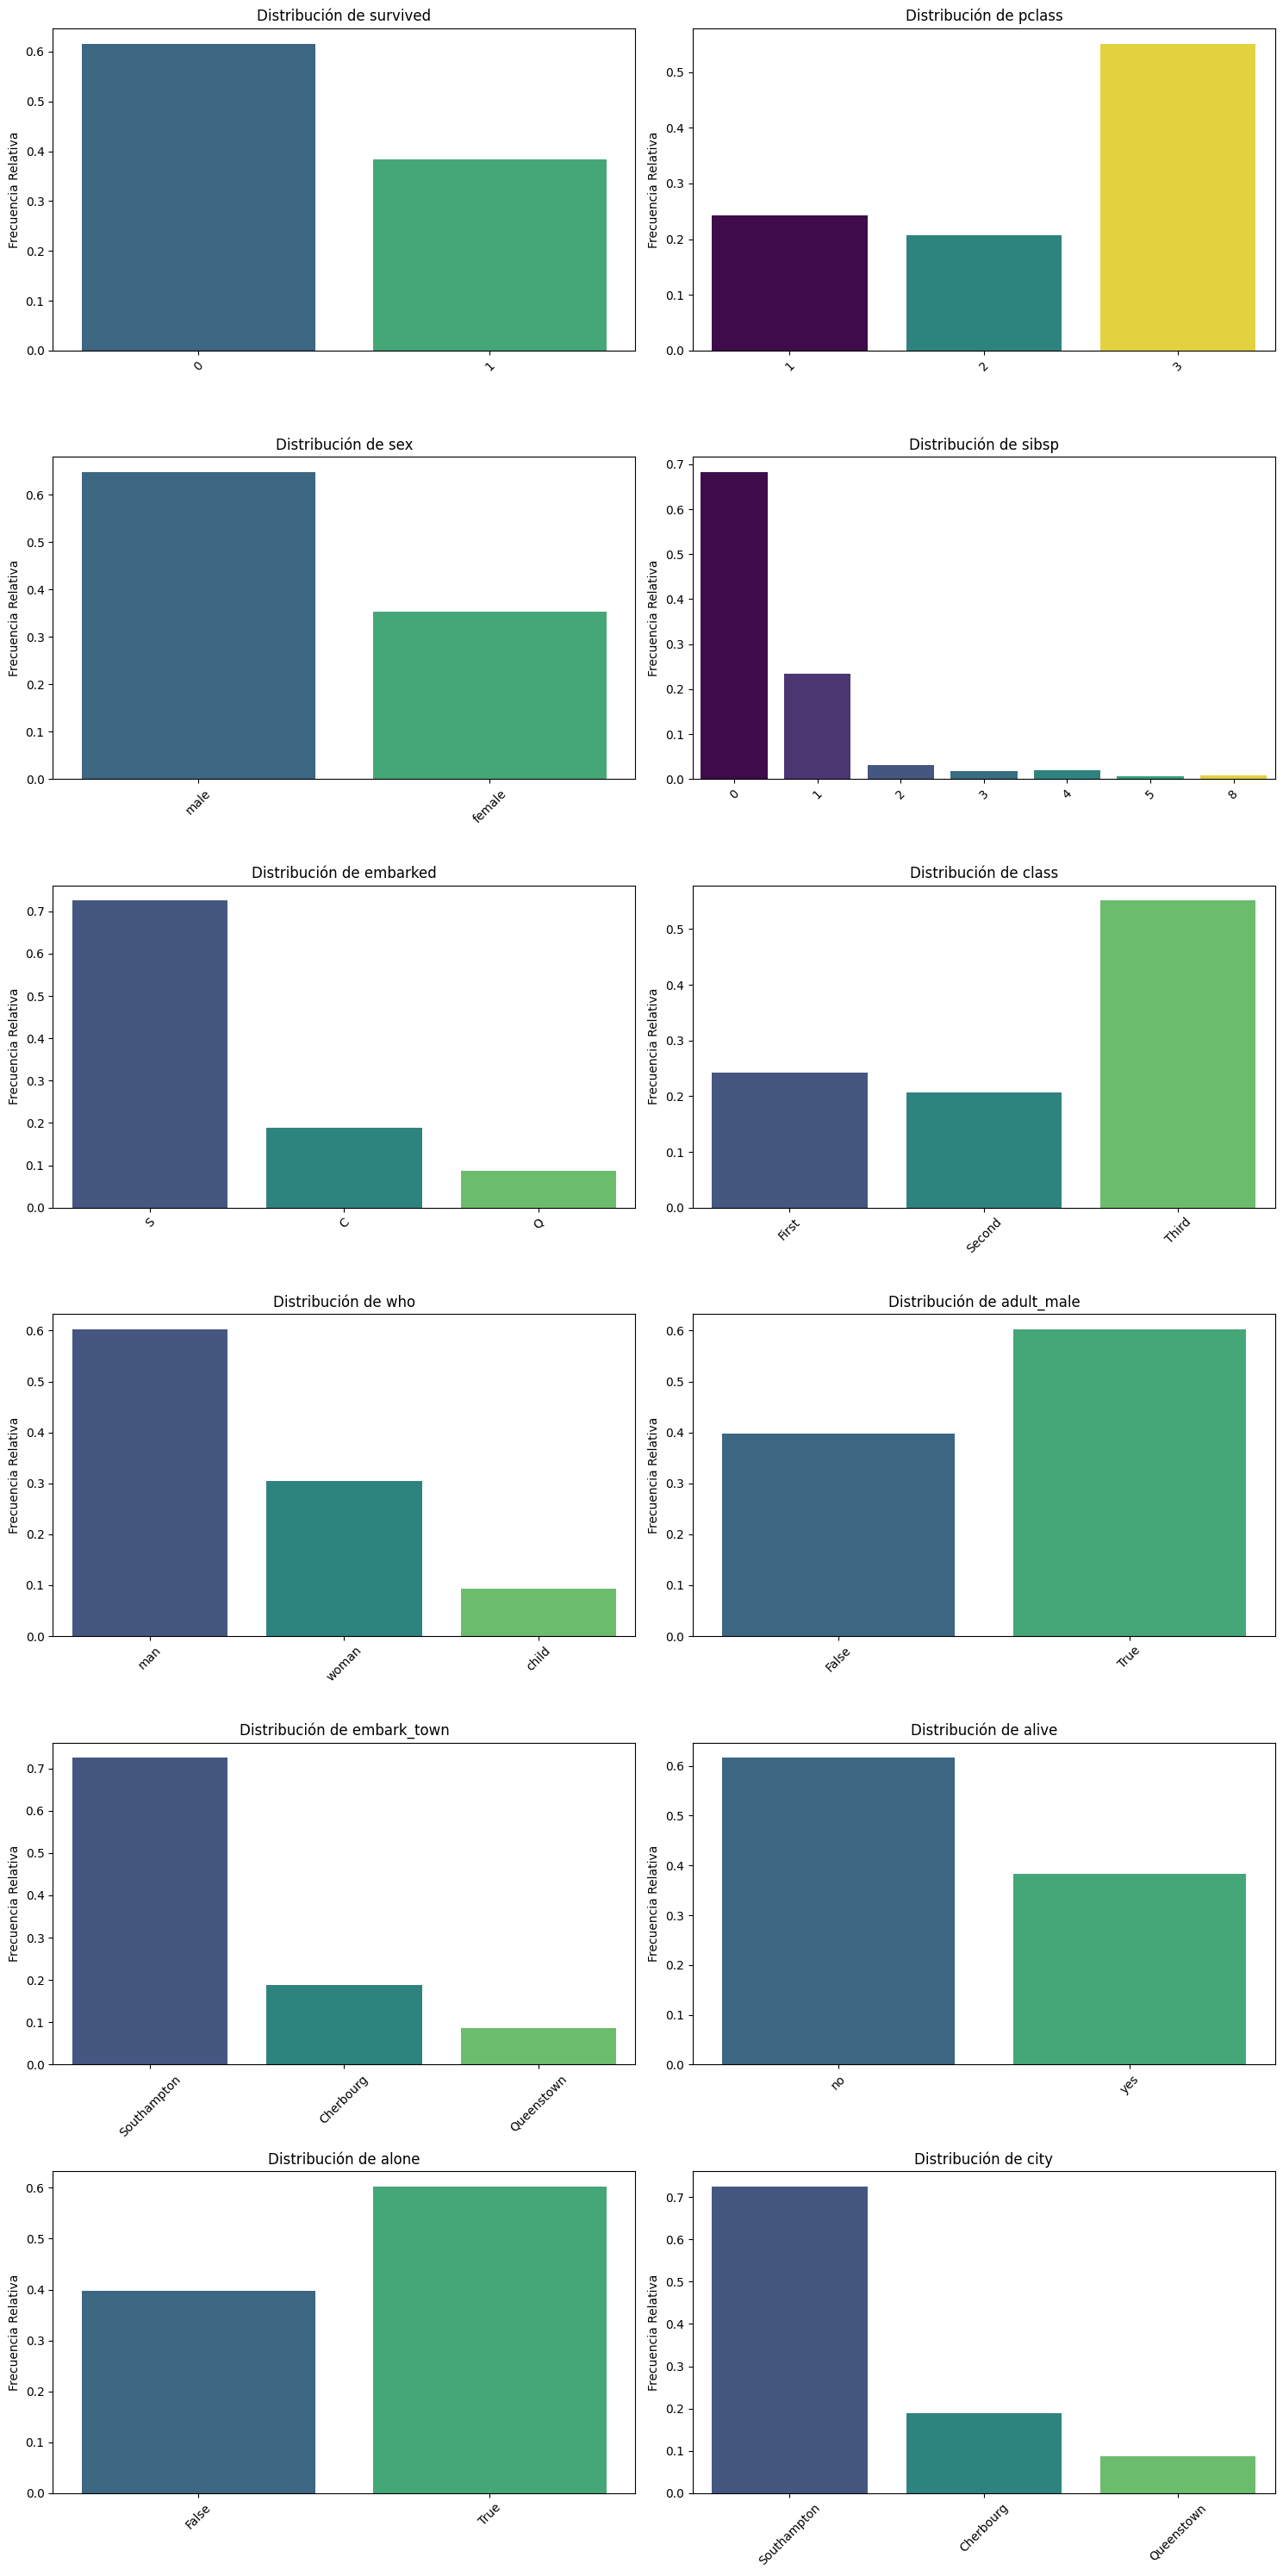

In [25]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, categoricas_titanic, relativa=True)

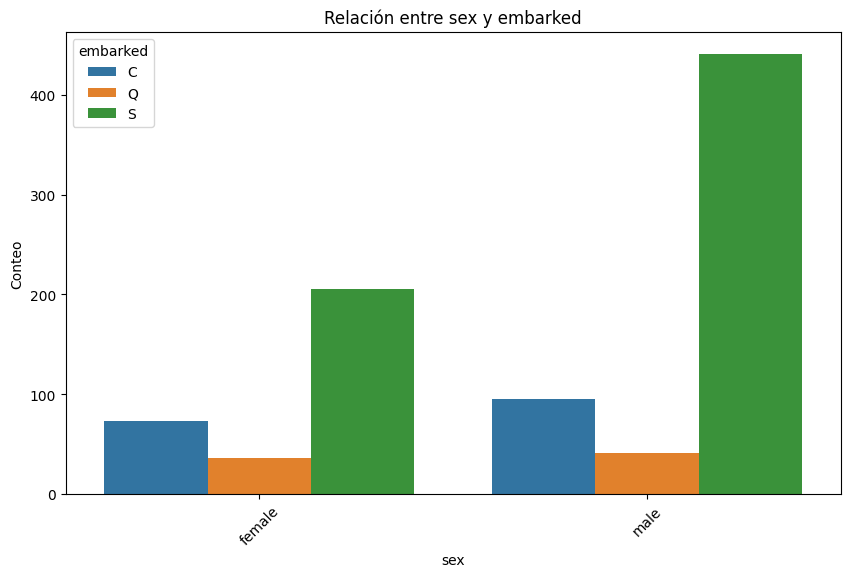

In [26]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic, "sex", "embarked")

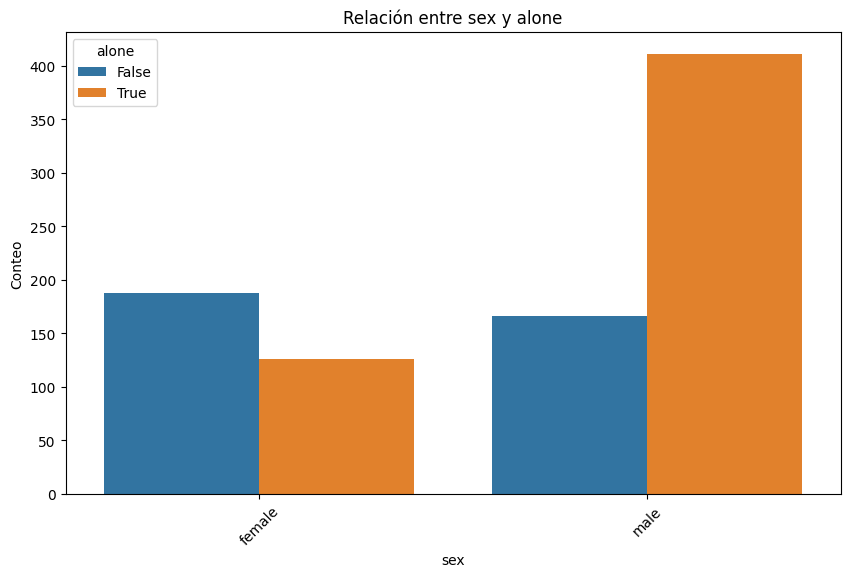

In [27]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic, "sex", "alone")

/Users/jesusgs/Desktop/Jesus GS/Formacion/BootCamp D&A/DS/ONLINE_DS_THEBRIDGE_JesusGonzalezSuarez/Sprint7/Unidad_01/Practica_Obligatoria/bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


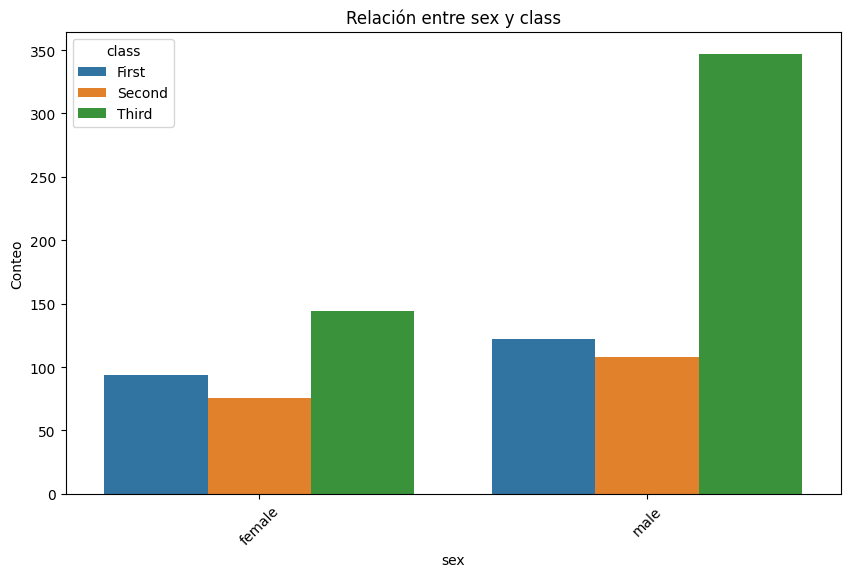

In [28]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic, "sex", "class")

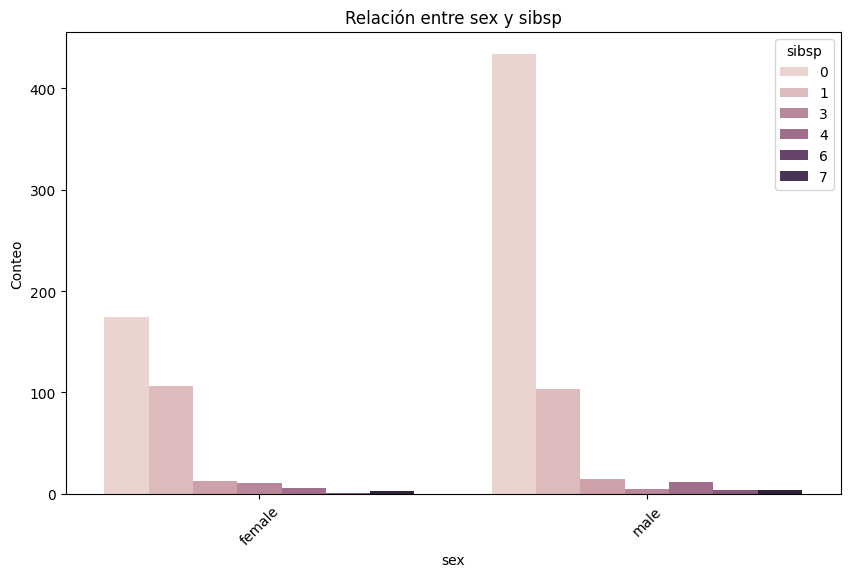

In [29]:
bootcampviztools.plot_categorical_relationship_fin(df_titanic, "sex", "sibsp")

| Columna| Conclusiones |
| ---------------- | ----------- |
| -survived       | - el porcentaje de supervivientes/Fallecidos es muy parejo |
| -pclass       | - Los pasajeros eligieron preferentemente la 3 clase, ya que la suma de 1 y 2 clase es el total de pasjeros en tercera mas o menos |
| -Embarked       | - La mayoria de pasajeros embarco en Southampton|

### #2.2 Numéricas

In [30]:
Numericas_titanic = df_tipificacion.loc[df_tipificacion["Clasificada_como"] == "Numerica Continua"].index
#Percentiles random
for num in Numericas_titanic:
    print(num, df_titanic[num].quantile(0.5),
    df_titanic[num].quantile(0.7), 
      df_titanic[num].quantile(0.95),
     df_titanic[num].max())

age 29.69911764705882 32.5 54.0 80.0
fare 14.4542 27.0 112.07915 512.3292


In [31]:
#Cuartiles
df_titanic[["age", "fare"]].describe()

,age,fare
count,891.000000,891.000000
mean,29.699118,32.204208
std,13.002015,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,29.699118,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [32]:
#IGR : rango Intercuartilico
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [33]:
for num in Numericas_titanic:
    print(num, get_IQR(df_titanic, num))

age 13.0
fare 23.0896


In [ ]:
#Fara no es una variable dispersa porque la mayoria han cogido tarifa de 3 clase pero si que tiene valores anomalos de primera y segunda
#edad tampoco es una variable dispersa ya que el 75% de las edades esta por debajo de los 35 años

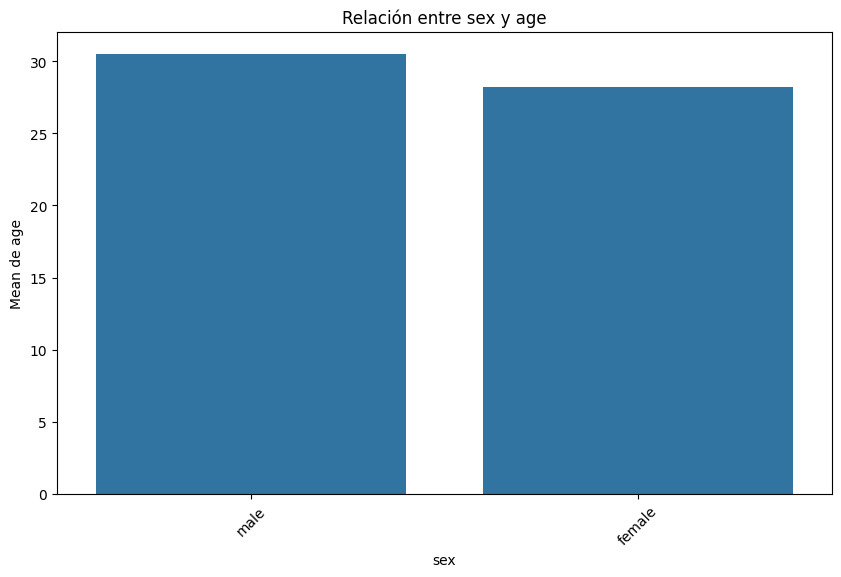

In [34]:
bootcampviztools.plot_categorical_numerical_relationship(df_titanic, "sex", "age")

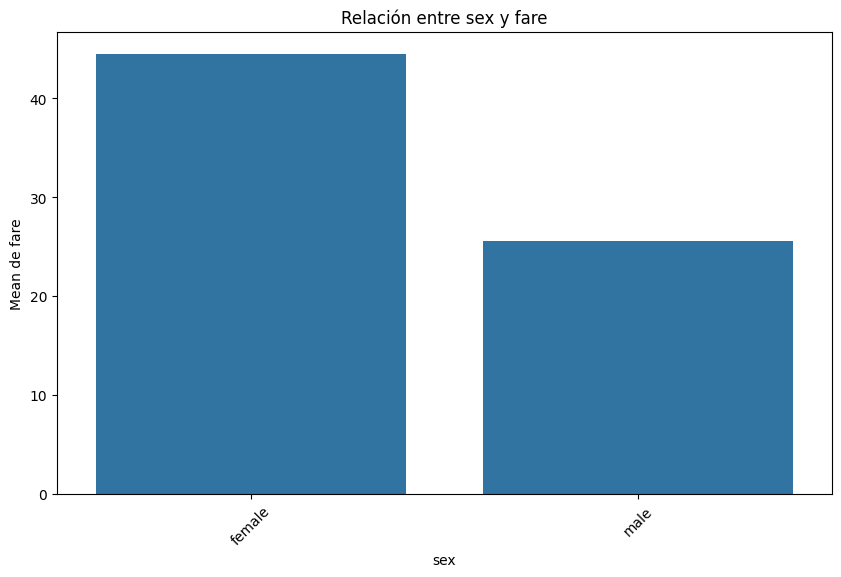

In [155]:
bootcampviztools.plot_categorical_numerical_relationship(df_titanic, "sex", "fare")

(2, 2)


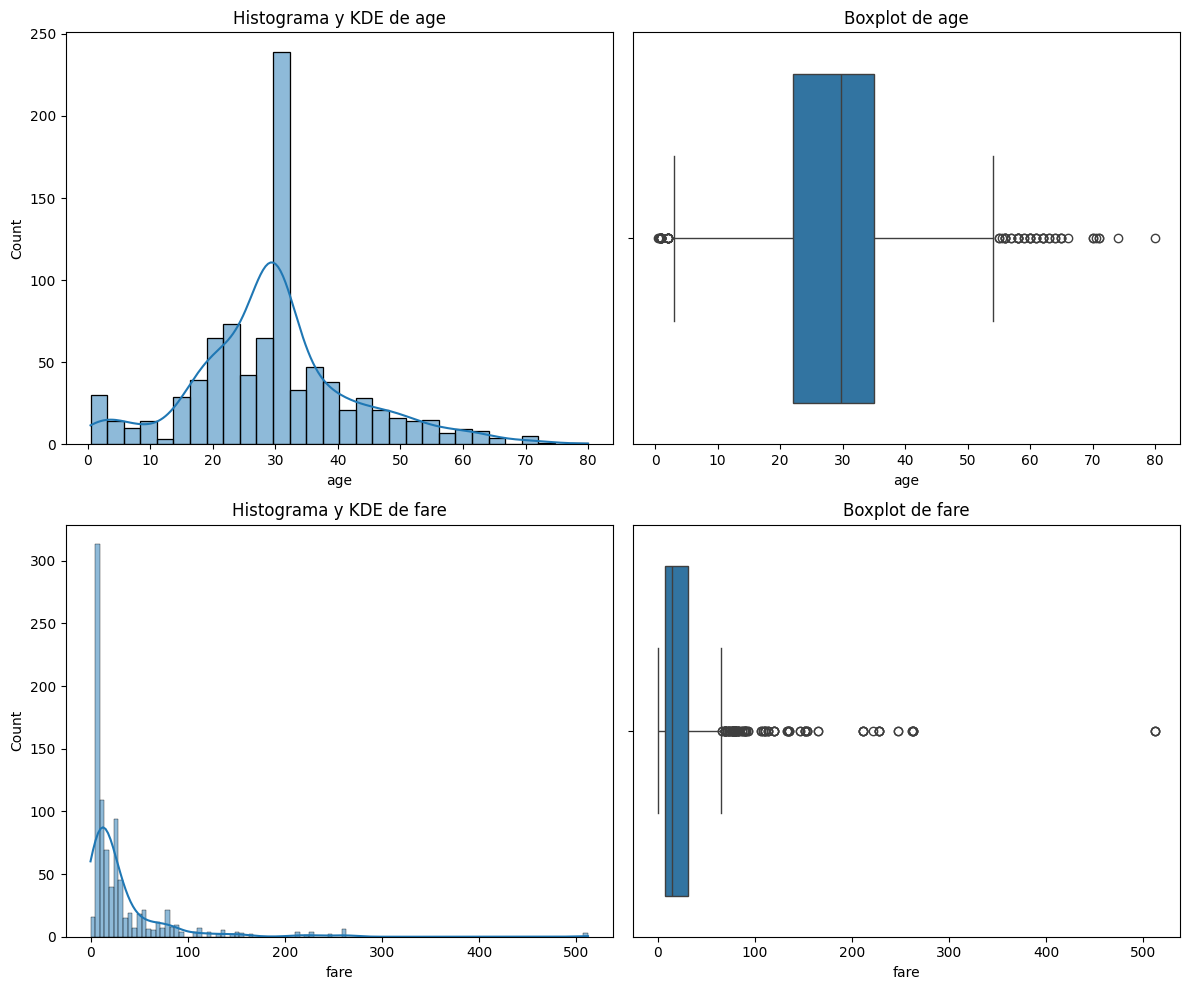

In [37]:
bootcampviztools.plot_combined_graphs(df_titanic,Numericas_titanic)

En general no son variables muy dispersas pero lo que si que es cierto que hay algun valor anomalo en ambas